In [1]:
import numpy as np
from eryn.backends import HDFBackend as eryn_HDF_Backend
import matplotlib.pyplot as plt
import corner
import os
import warnings
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
plt.rcParams['font.size'] = 20

notebook_direc = os.getcwd()
plot_direc = notebook_direc + "/plots"
run_direc = "/work/scratch/data/burkeol/kerr_few_paper/Pure_Kerr_MCMC/"

os.listdir(run_direc)

['cluster_kerr_inj_kerr_recov_M_1e5_mu_1e3_a_0p95_p0_74p94184_e0_0p85_dist_2_SNR_443_dt_5_T_2.h5',
 'cluster_kerr_inj_kerr_recov_M_1e7_mu_1e1_a_0p998_p0_2p12_e0_0p425_dist_5p465_SNR_30_dt_10_T_2.h5',
 'cluster_kerr_inj_kerr_recov_M_1e5_mu_1e4_a_0p95_p0_133p4623_e0_0p85_dist_10_SNR_212_dt_5_T_2.h5',
 'cluster_kerr_inj_kerr_recov_M_1e5_mu_70_a_0p998_p0_44p321_e0_0p5_dist_7p28_SNR_30_dt_5_T_2.h5',
 'cluster_kerr_inj_kerr_recov_M_1e7_mu_1e5_a_0p95_p0_23p6015_e0_0p85_dist_7p5_SNR_485_dt_10_T_2_wide_prior_mu.h5',
 'cluster_kerr_inj_kerr_recov_M_1e7_mu_1e5_a_0p95_p0_23p6015_e0_0p85_dist_7p5_SNR_485_dt_10_T_2.h5',
 'cluster_kerr_inj_kerr_recov_M_1e6_mu_10_a_0p998_e0_0p73_p0_7p7275_e0_0p73_dist_7p66_SNR_20_dt_5_T_2.h5']

In [2]:
# Now analyse the results using 9PN for circular orbits
    
def analyse_samples(file_path, discard = 0):
    reader = eryn_HDF_Backend(file_path,read_only = True)

    N_iterations = reader.get_chain()['model_0'].shape[0]
    N_temps = reader.get_chain()['model_0'].shape[1]
    N_walkers = reader.get_chain()['model_0'].shape[2]
    N_params = reader.get_chain()['model_0'].shape[-1]

    samples_after_burnin = [reader.get_chain(discard = discard)['model_0'][:,i].reshape(-1,N_params) 
                        for i in range(N_temps)]  # Take true chain]


    log_like = reader.get_log_like(discard = discard)
    plt.plot(log_like[:,0,:]);
    plt.xlabel(r'Iteration')
    plt.ylabel(r'Log likelihood')
    plt.show()
    return samples_after_burnin, log_like, N_params

def corner_plot(burned_samples, true_params, param_labels, corner_kwargs, title = r'Corner plot', plot_name = None):

    N_params = len(param_labels)
    true_params = true_params[0:N_params]
    trunc_samples = burned_samples[0][:,:N_params]
    print(trunc_samples.shape)
    
    samples_corner = np.column_stack(trunc_samples)

    figure = corner.corner(trunc_samples,bins = 30, color = 'blue', **corner_kwargs)

    
    axes = np.array(figure.axes).reshape((N_params, N_params))

    for i in range(N_params):
        ax = axes[i, i]
        ax.axvline(true_params[i], color="k")

    for yi in range(N_params):
        for xi in range(yi):
            ax = axes[yi, xi]
            ax.axhline(true_params[yi], color="k")
            ax.axvline(true_params[xi],color= "k")
            ax.plot(true_params[xi], true_params[yi], "sk")

    for ax in figure.get_axes():
        ax.tick_params(axis='both', labelsize=18)

    blue_line = mlines.Line2D([], [], color='blue', label=r'Posterior Distributions')
    black_line = mlines.Line2D([], [], color='black', label='True Value')

    # plt.legend(handles=[blue_line,black_line], fontsize = 65, frameon = True, bbox_to_anchor=(0.25, N_params), loc="upper right", title = title, title_fontproperties = FontProperties(size = , weight = 'bold'))
    # plt.subplots_adjust(left=-0.1, bottom=-0.1, right=None, top=None, wspace=0.15, hspace=0.15)
    if plot_name:
        plt.savefig(plot_name, bbox_inches = "tight")
    return figure



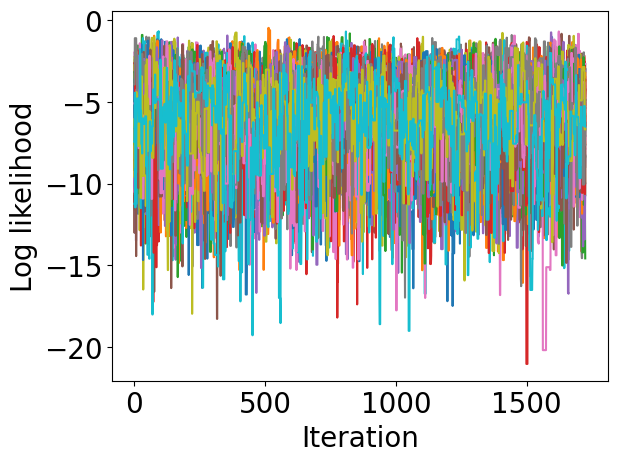

In [3]:
file_path = run_direc + 'cluster_kerr_inj_kerr_recov_M_1e5_mu_70_a_0p998_p0_44p321_e0_0p5_dist_7p28_SNR_30_dt_5_T_2.h5'

samples_after_burnin_IMRI, log_like_IMRI, N_params = analyse_samples(file_path, discard = 400)

(86250, 5)


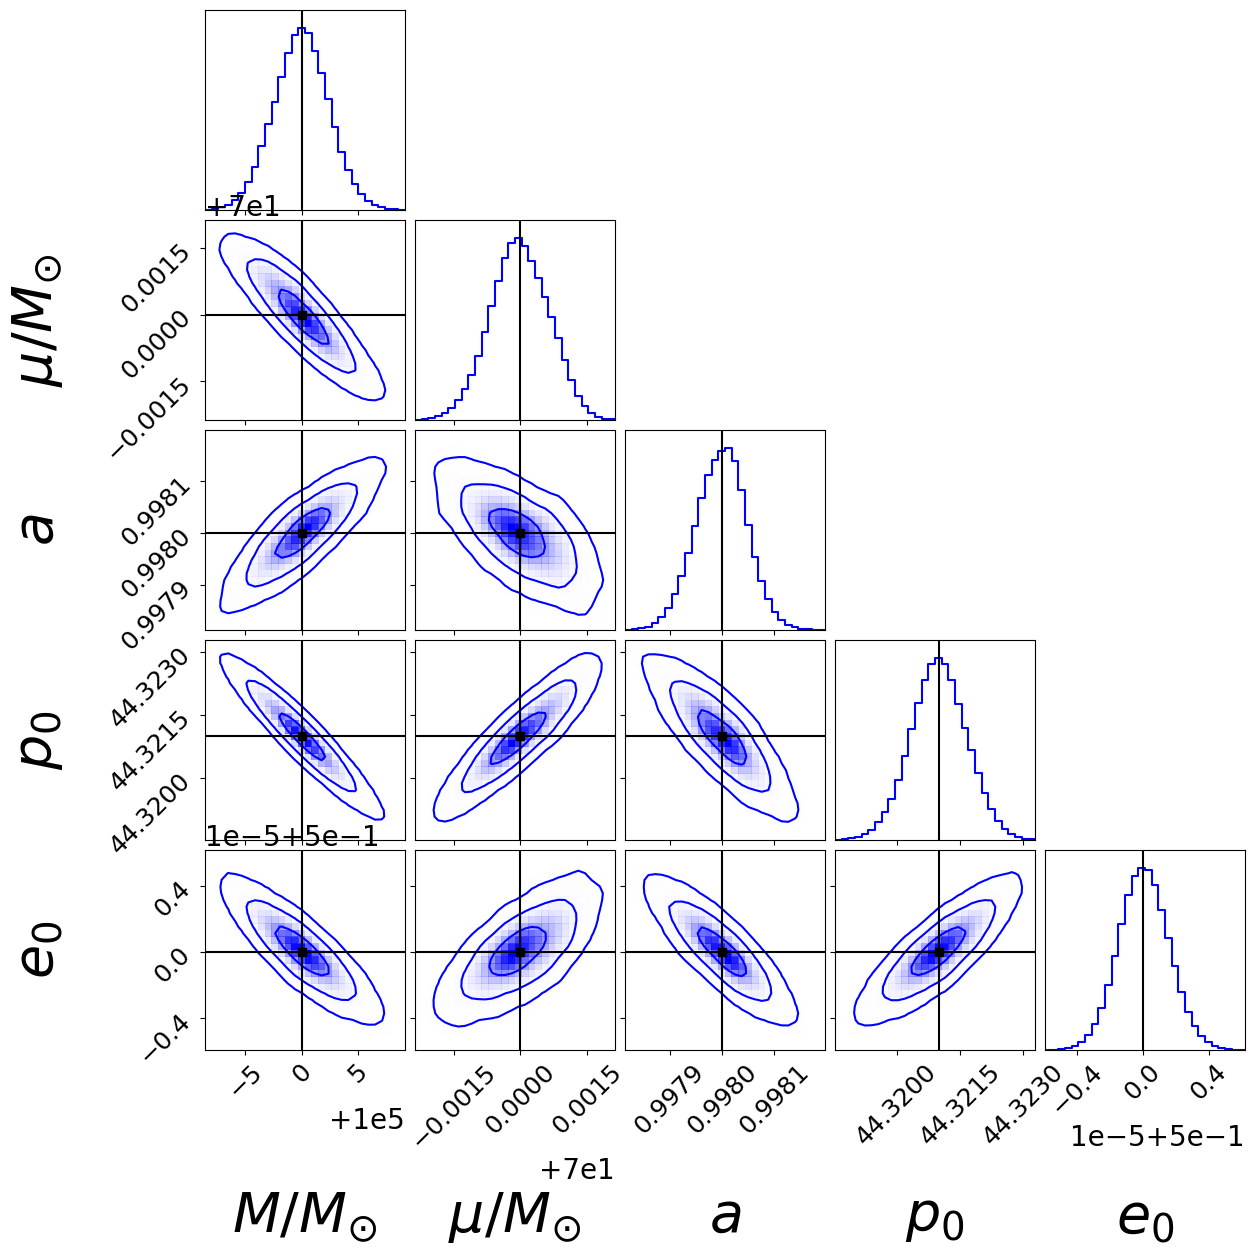

In [4]:
IMRI_plot_name = plot_direc + "/M_1e5_mu_70_a_0p998_p0_44p321_e0_0p5_dist_7p28_SNR_30_dt_5_T_2.png"

# params_label =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$a$", 
#                      r"$p_{0}$", r"$e_{0}$", r"$D_{s}/Gpc$", 
#                      r"$\theta_{S}$", r"$\phi_{S}$", r"$\theta_{K}$", r"$\phi_{K}$", 
#                      r"$\Phi_{\phi_{0}}$", r"$\Phi_{r_{0}}$"] 

params_label =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$a$", 
                     r"$p_{0}$", r"$e_{0}$"] 

true_vals = np.array([1e5,70,0.998, 44.321, 0.5, 7.28, 0.5, 1.2, 0.8, 0.2, 1.0, 3.0])

corner_kwargs = dict(plot_datapoints=False,smooth1d=True,
                       labels=params_label, levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), 
                       label_kwargs=dict(fontsize=40), max_n_ticks=4,
                       show_titles=False, smooth = True, labelpad = 0.4)

figure_IMRI = corner_plot(samples_after_burnin_IMRI, true_vals, params_label, corner_kwargs, plot_name = IMRI_plot_name)

In [5]:
trunc_samps = samples_after_burnin_IMRI[0][-20000:,:]
Cov_Matrix = np.cov(trunc_samps,rowvar = False)

In [6]:
np.save("Data/Cov_Matrix_M_1e5_mu_70_a_0p998_p0_44p321_e0_0p5_dist_7p28_SNR_30_dt_5_T_2.npy",Cov_Matrix)


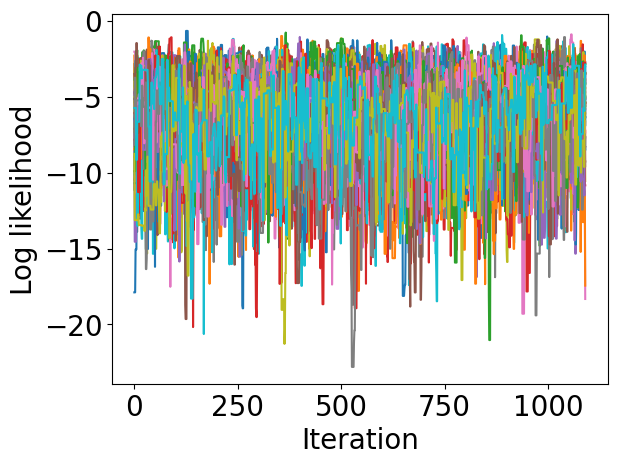

In [7]:
file_path = run_direc + 'cluster_kerr_inj_kerr_recov_M_1e6_mu_10_a_0p998_e0_0p73_p0_7p7275_e0_0p73_dist_7p66_SNR_20_dt_5_T_2.h5'

samples_after_burnin_EMRI, log_like_EMRI, N_params = analyse_samples(file_path, discard = 800)

(54550, 5)


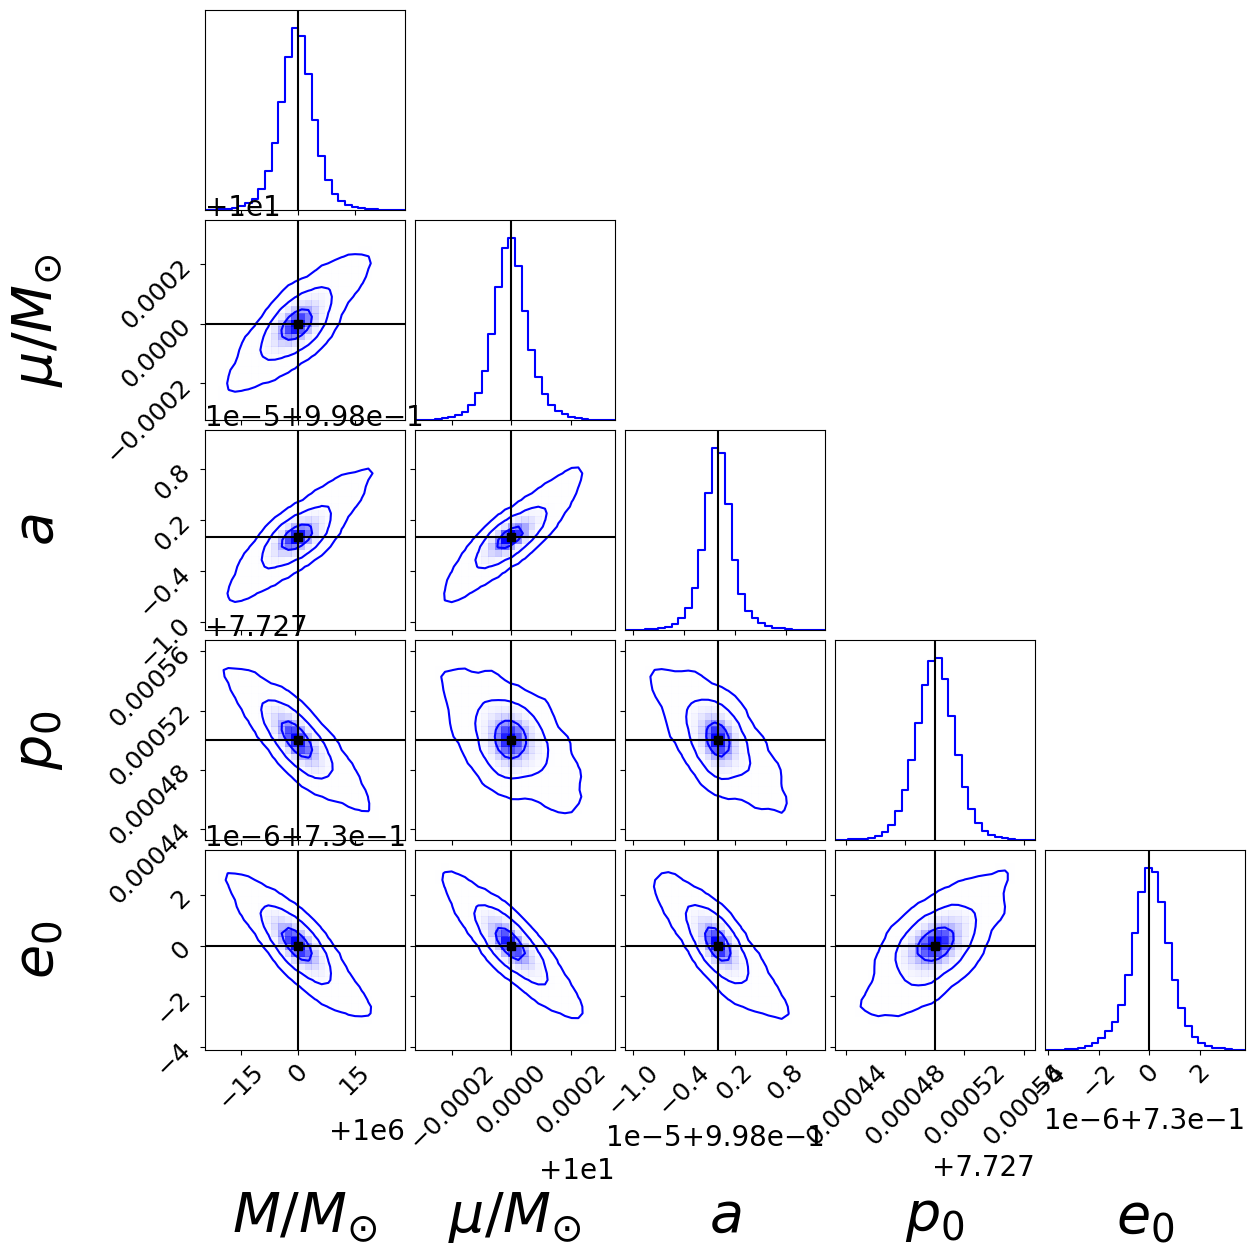

In [8]:
EMRI_plot_name = plot_direc + "/M_1e6_mu_10_a_0p998_e0_0p73_p0_7p7275_e0_0p73_dist_7p66_SNR_20_dt_5_T_2.png"

params_label =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$a$", 
                     r"$p_{0}$", r"$e_{0}$"] 

true_vals_EMRI = np.array([1e6,10,0.998, 7.7275, 0.73, 7.6, 0.5, 1.2, 0.8, 0.2, 1.0, 3.0])
figure_EMRI = corner_plot(samples_after_burnin_EMRI, true_vals_EMRI, params_label,corner_kwargs, plot_name = EMRI_plot_name)

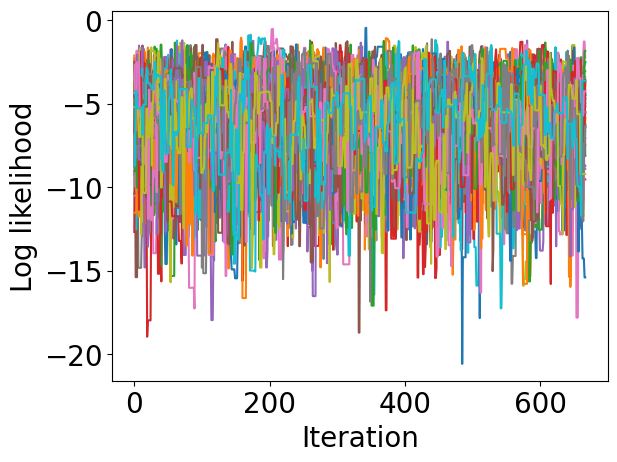

In [9]:
file_path_mega_IMRI_wide_prior = run_direc + 'cluster_kerr_inj_kerr_recov_M_1e7_mu_1e5_a_0p95_p0_23p6015_e0_0p85_dist_7p5_SNR_485_dt_10_T_2_wide_prior_mu.h5'

samples_after_burnin_mega_IMRI_wide_prior, log_like_mega_IMRI_wide_prior, _ = analyse_samples(file_path_mega_IMRI_wide_prior, discard = 200)


(33400, 5)


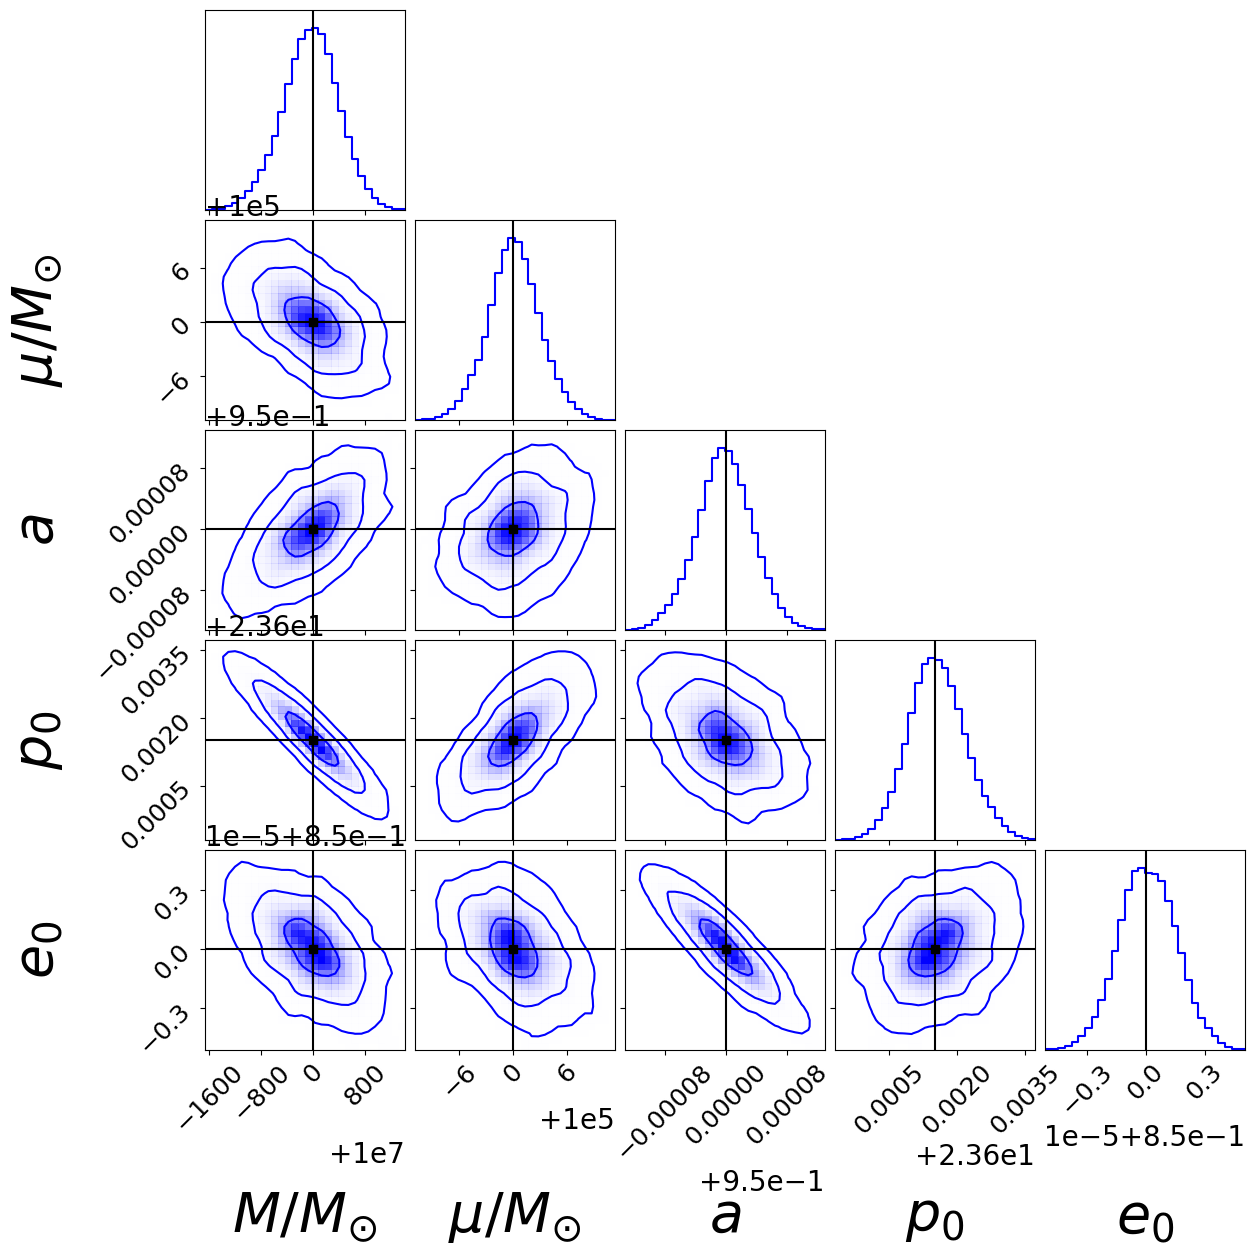

In [10]:
mega_IMRI_plot_name_wide_prior = plot_direc + "/M_1e7_mu_1e5_a_0p95_p0_23p6015_e0_0p85_dist_7p25_SNR_480_dt_10_T_2.png"

params_label =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$a$", 
                     r"$p_{0}$", r"$e_{0}$"] 

true_vals_mega_IMRI = np.array([1e7,1e5,0.95, 23.6015, 0.85, 7.25, 0.5, 1.2, 0.8, 0.2, 2.0, 4.0])

corner_kwargs_mega_IMRI = dict(plot_datapoints=False,smooth1d=True,
                       labels=params_label, levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), 
                       label_kwargs=dict(fontsize=20), max_n_ticks=4,
                       show_titles=False, smooth = True, labelpad = 0.4)

figure_mega_IMRI = corner_plot(samples_after_burnin_mega_IMRI_wide_prior, true_vals_mega_IMRI, params_label, corner_kwargs, plot_name = mega_IMRI_plot_name_wide_prior)

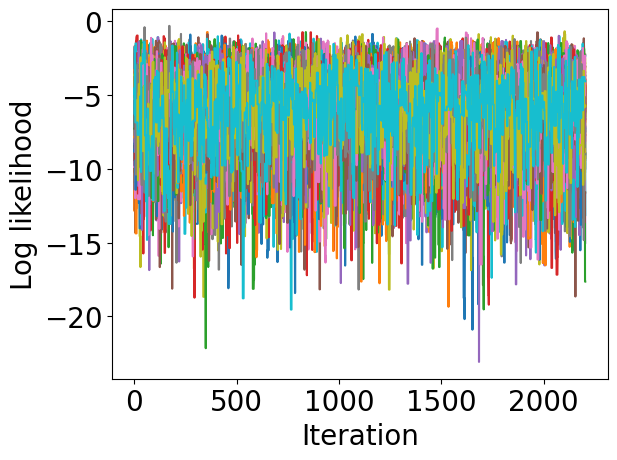

In [11]:
file_path_light_IMRI = run_direc + 'cluster_kerr_inj_kerr_recov_M_1e5_mu_1e3_a_0p95_p0_74p94184_e0_0p85_dist_2_SNR_443_dt_5_T_2.h5'

samples_after_burnin_light_IMRI, log_like_light_IMRI, _ = analyse_samples(file_path_light_IMRI, discard = 200)


(110200, 5)


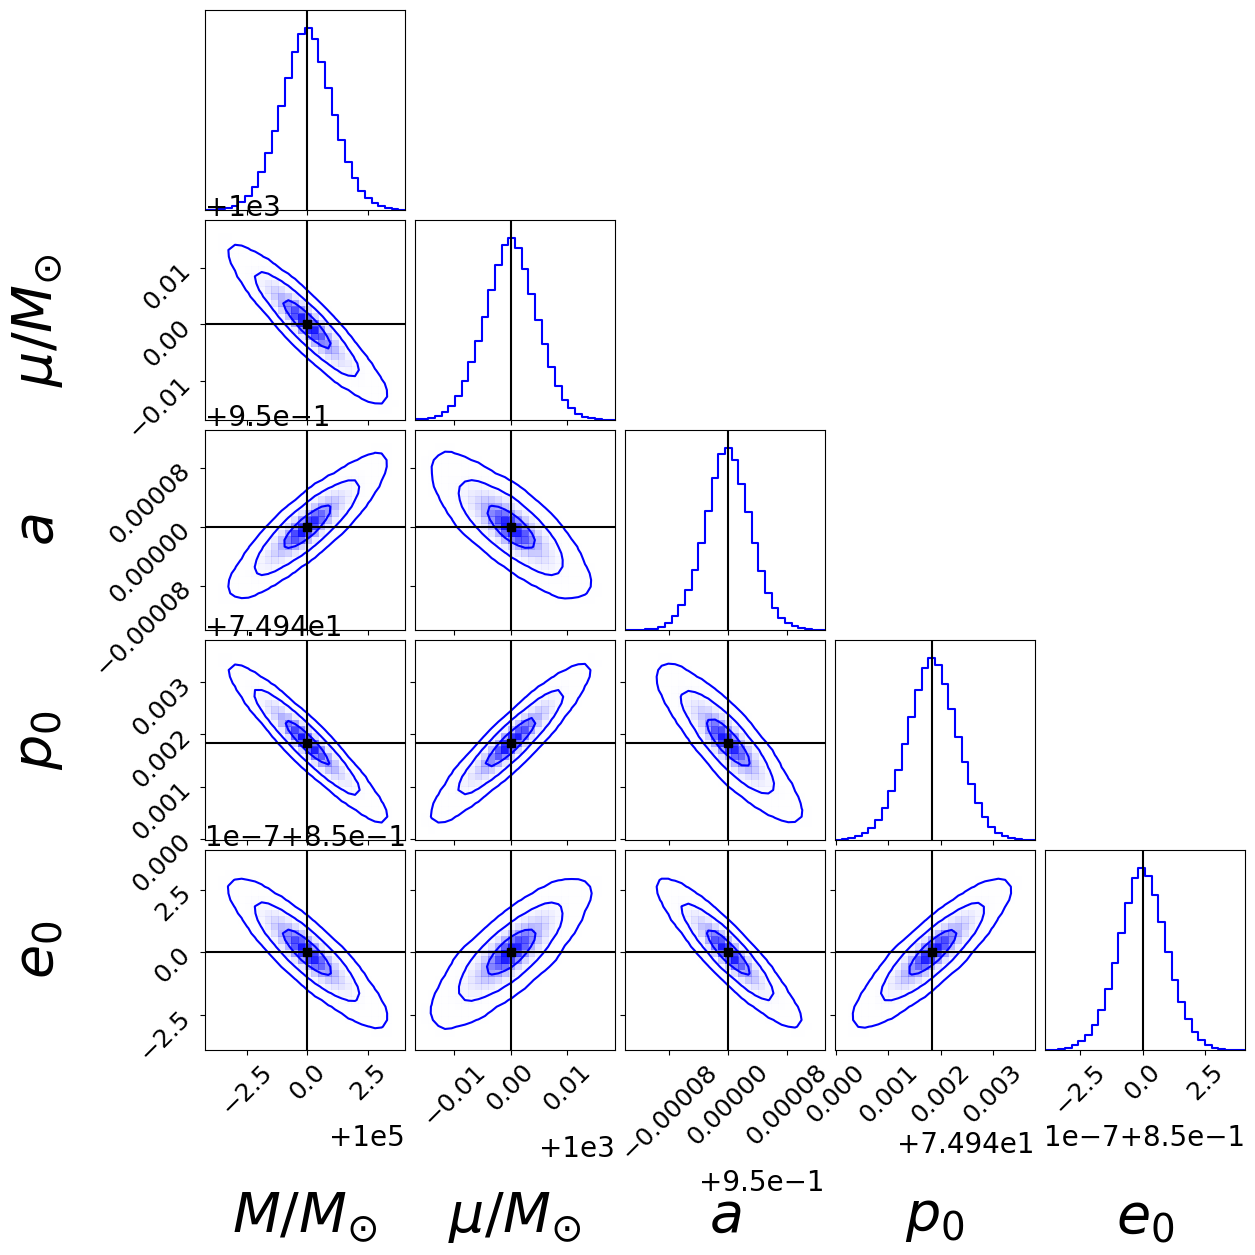

In [12]:
light_IMRI_plot_name = plot_direc + "/M_1e5_mu_1e3_a_0p95_p0_74p94184_e0_0p85_dist_2_SNR_443_dt_5_T_2.png"

params_label =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$a$", 
                     r"$p_{0}$", r"$e_{0}$"] 

true_vals_light_IMRI = np.array([1e5,1e3,0.95, 74.94184, 0.85, 2, 0.5, 1.2, 0.8, 0.2, 2.0, 4.0])

corner_kwargs_mega_IMRI = dict(plot_datapoints=False,smooth1d=True,
                       labels=params_label, levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), 
                       label_kwargs=dict(fontsize=20), max_n_ticks=4,
                       show_titles=False, smooth = True, labelpad = 0.4)

figure_light_IMRI = corner_plot(samples_after_burnin_light_IMRI, true_vals_light_IMRI, params_label, corner_kwargs, plot_name = light_IMRI_plot_name)

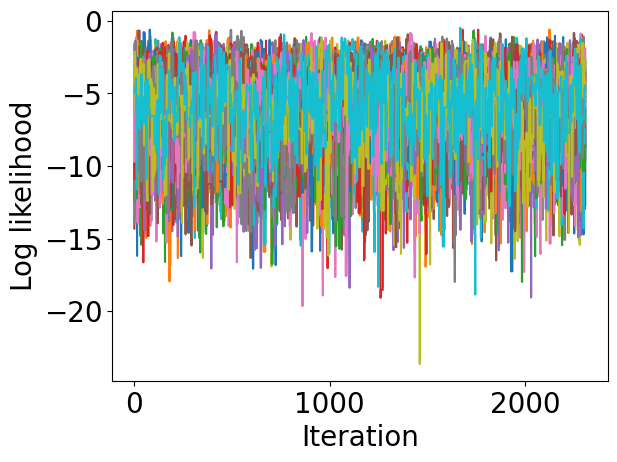

In [13]:
file_path_q10 = run_direc + 'cluster_kerr_inj_kerr_recov_M_1e5_mu_1e4_a_0p95_p0_133p4623_e0_0p85_dist_10_SNR_212_dt_5_T_2.h5'

samples_after_burnin_q10, log_like_q10, _ = analyse_samples(file_path_q10, discard = 200)


(115450, 5)


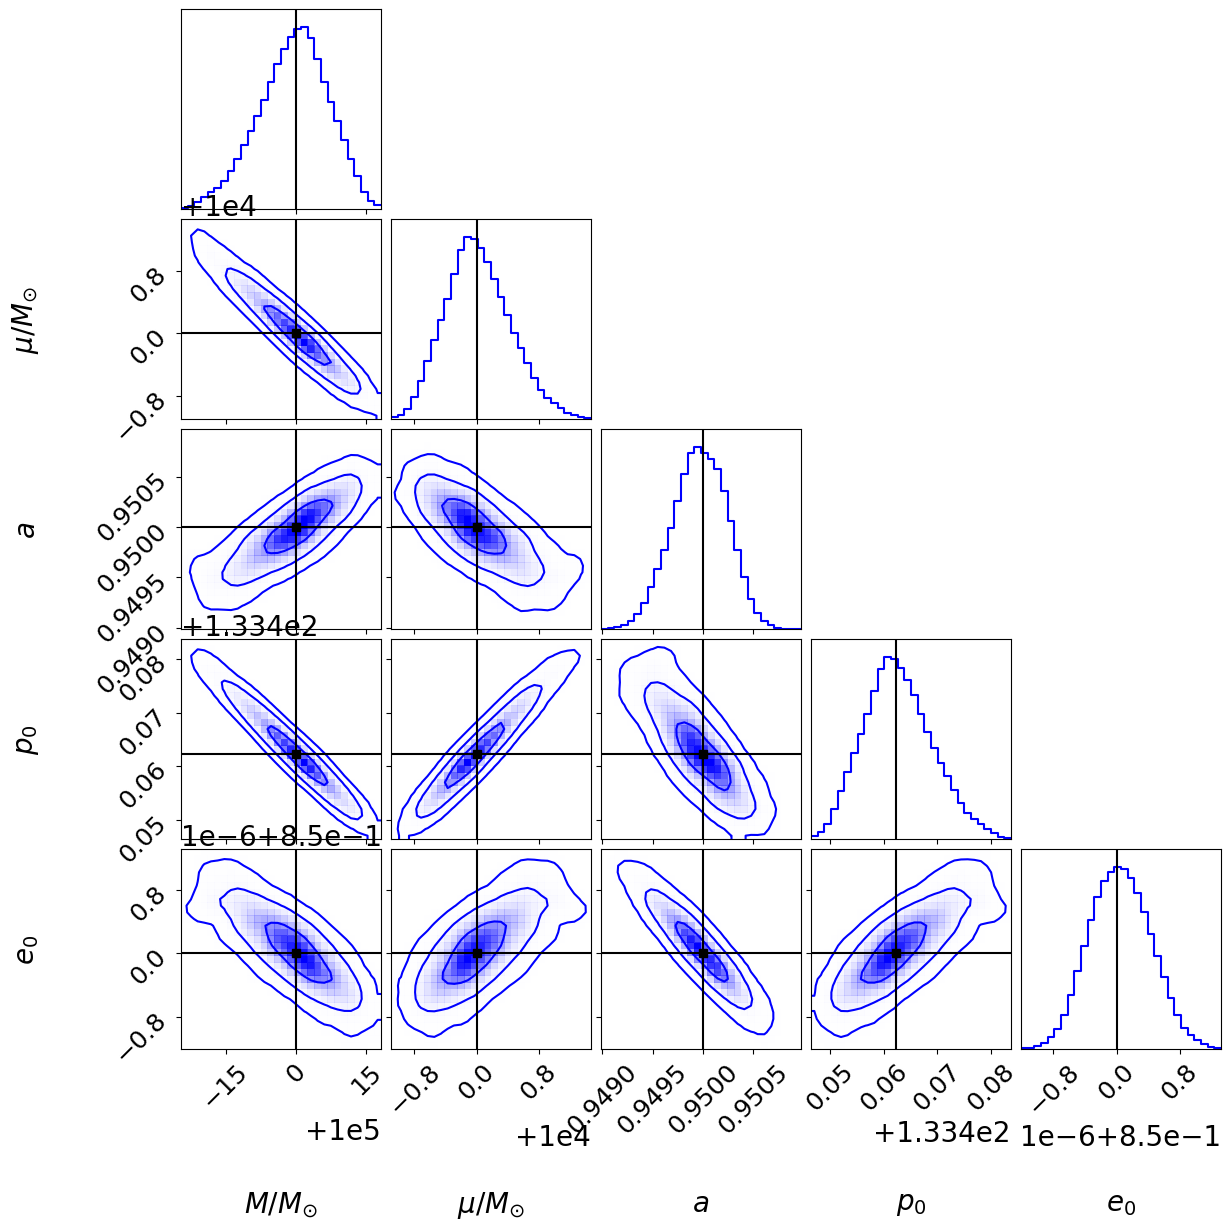

In [14]:
q10_plot_name = plot_direc + "/M_1e5_mu_1e4_a_0p95_p0_133p4623_e0_0p85_dist_10_SNR_212_dt_5_T_2.png"

params_label =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$a$", 
                     r"$p_{0}$", r"$e_{0}$"] 

true_vals_q10 = np.array([1e5,1e4,0.95, 133.4623, 0.85, 10, 0.5, 1.2, 0.8, 0.2, 2.0, 4.0])

corner_kwargs_q10 = dict(plot_datapoints=False,smooth1d=True,
                       labels=params_label, levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), 
                       label_kwargs=dict(fontsize=20), max_n_ticks=4,
                       show_titles=False, smooth = True, labelpad = 0.4)

figure_q10 = corner_plot(samples_after_burnin_q10, true_vals_q10, params_label, corner_kwargs_q10, plot_name = q10_plot_name)

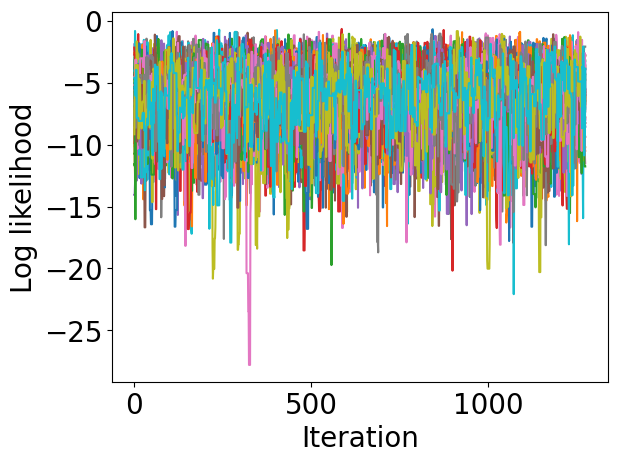

In [15]:
file_path_mega_EMRI = run_direc + 'cluster_kerr_inj_kerr_recov_M_1e7_mu_1e1_a_0p998_p0_2p12_e0_0p425_dist_5p465_SNR_30_dt_10_T_2.h5'

samples_after_burnin_mega_EMRI, log_like_mega_EMRI, _ = analyse_samples(file_path_mega_EMRI, discard = 1000)


In [16]:
plot_direc

'/home/ad/burkeol/work/Parameter_Estimation_EMRIs/Kerr_FEW_PE/notebooks/plots'

(63750, 5)


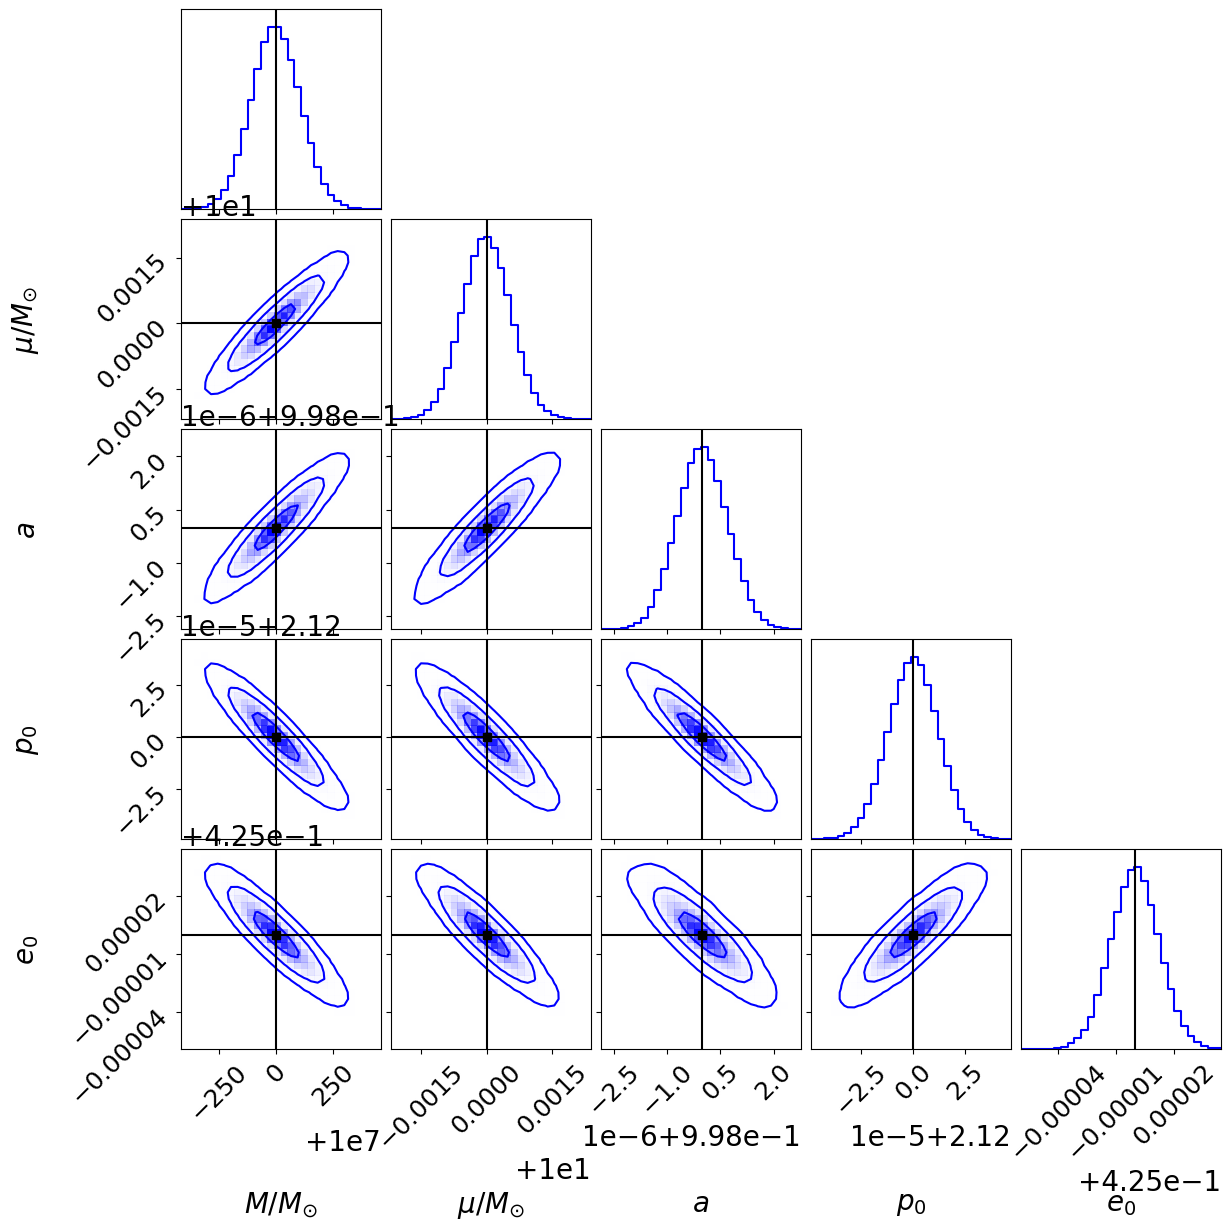

In [17]:
mega_EMRI_plot_name = plot_direc + "/M_1e7_mu_1e1_a_0p998_p0_2p12_e0_0p425_dist_5p465_SNR_30_dt_10_T_2.png"

params_label =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$a$", 
                     r"$p_{0}$", r"$e_{0}$"] 

true_vals_mega_EMRI = np.array([1e7,1e1,0.998, 2.12, 0.425, 5.465, 0.5, 1.2, 0.8, 0.2, 2.0, 4.0])

corner_kwargs_mega_EMRI = dict(plot_datapoints=False,smooth1d=True,
                       labels=params_label, levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), 
                       label_kwargs=dict(fontsize=20), max_n_ticks=4,
                       show_titles=False, smooth = True, labelpad = 0.4)

figure_q10 = corner_plot(samples_after_burnin_mega_EMRI, true_vals_mega_EMRI, params_label, corner_kwargs_mega_EMRI, plot_name = mega_EMRI_plot_name)

In [34]:
Cov_Matrix_mega_EMRI = np.cov(samples_after_burnin_mega_EMRI[0][-100000:,:],rowvar = False).shape
np.save("Data/Cov_Matrix_M_1e7_mu_1e1_a_0p998_p0_2p12_e0_0p425_dist_5p465_SNR_30_dt_10_T_2.png", Cov_Matrix_mega_EMRI)

In [31]:
os.getcwd()

'/home/ad/burkeol/work/Parameter_Estimation_EMRIs/Kerr_FEW_PE/notebooks'